etd

# Exercice

* ecrire une fonction pour extraire le host name dans l'email de la table client 
    example: LaurentDagenais@rhyta.com, hostname = rhyta
* Compter le nombre de CP par ville
* Revenu par ville et par genre (min, max, median, moyenne, 3ieme quartille)
* histograme median des taux par ville
* histograme median des taux par genre
* histograme median des taux par genre et type
* histograme median des taux par genre et ville
* boxplot des revenus par ville
* une table qui contient les clients et leur emails avec les revuns supérieurs au revenu median
* le code postal (CP) ou on passe moin de temps  
* 5 premier cp avec le plus haut taux  
* 5 premier cp avec le plus haut revenu  

# Objectif 

# Table de matière


#  Devoir


1. La différence entre Pandas et SQL :

SQL est un langage qui permet de créer, gérer et de récupérer des informations dans une base de données, par contre Python est un  langage de programmation polyvalent qui possède également un bibliothèque permettant la gestion des bases de données, cependant sa plus grande force réside dans l'analyse et le traitement des informations.

2. Limites de Pandas :
- Vitesse d'exécution lente
- Pandas n'est pas approprié pour combiner les données de plusieurs tables dans une seule base de données
- Les commandes et fonctions d'agrégation de Python à utiliser sur les bases de données sont très complexes à côté de celles de SQL
Limites de SQL :
- SQL n'est pas approprié pour l'analyse et l'interprétation des données
- SQL n'est pas aussi flexible que python, ie sa capacité à fonctionner sur diverses plateformes.

3.Un exemple de code python qui appelle SQL :

4. Nous allons importer deux tables au format csv : clients et prets


## 1. Import library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Function 

In [1]:
email = "mbiethieucezar@gmail.com"
print(email.split('@')[1].split('.')[0])

gmail


In [3]:
def extraire_hostname_string(emails):
    
    hostname = emails.split('@')[1].split('.')[0]
    return hostname

In [4]:
def extraire_hostname(df):
    get_a_string = lambda x : extraire_hostname_string(x)

    df['hotname'] = df['email'].apply(get_a_string) ## extraire_hostname_string() utiliser la fonction apply et lambda 
    return df

## 2. Read file

In [5]:
clients = pd.read_csv('clients.csv')
#clients.head()
print(extraire_hostname(clients))

     identifiant                            email                nom genre  \
0              0        LaurentDagenais@rhyta.com   Laurent Dagenais     M   
1              1            GuyMarois@fleckens.hu         Guy Marois     M   
2              2        BeaufortLesage@einrot.com    Beaufort Lesage     M   
3              3        RussellDurand@armyspy.com     Russell Durand     M   
4              4             AlexisRiel@rhyta.com        Alexis Riel     M   
..           ...                              ...                ...   ...   
223          223  ClaudeDandonneau@jourrapide.com  Claude Dandonneau     F   
224          224    ApollineMichaud@superrito.com   Apolline Michaud     F   
225          225       PascalineBeaudry@rhyta.com  Pascaline Beaudry     F   
226          226     FleurCaouette@jourrapide.com     Fleur Caouette     F   
227          227      FrancisMasse@jourrapide.com      Francis Masse     M   

        hotname  
0         rhyta  
1      fleckens  
2        

In [6]:
clients.shape

(228, 5)

In [7]:
prets = pd.read_csv('https://raw.githubusercontent.com/benjaminmrl/data-4452741/main/prets.csv')
prets.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014


In [8]:
#compter le nombre de CP par ville
prets.shape
count_ville = prets.groupby('ville').count()['CP']
print(count_ville)

ville
BORDEAUX     16
LYON         28
MARSEILLE    75
NICE         21
PARIS        77
TOULOUSE     27
Name: CP, dtype: int64


In [9]:
# Revenu par ville et par genre (min, max, median, moyenne, 3iem quartile)
#print(prets.head())
#prets.describe()
#print (prets.groupby(['ville', 'type']).describe()['revenu'])
# ou encore
print(prets.groupby(['ville', 'type']).agg(['min','max' ,'count', 'mean'])['revenu'])

                         min     max  count         mean
ville     type                                          
BORDEAUX  immobilier  2239.0  3691.0     16  3176.000000
LYON      automobile  2468.0  4737.0      3  3843.666667
          immobilier  1867.0  4771.0     25  3352.920000
MARSEILLE automobile  1288.0  2314.0      3  1947.333333
          immobilier  1200.0  2962.0     72  1945.611111
NICE      automobile  3493.0  4114.0      2  3803.500000
          immobilier  2433.0  5987.0     19  4088.473684
PARIS     automobile  3099.0  6069.0      5  4566.800000
          immobilier  1851.0  6807.0     72  4342.013889
TOULOUSE  automobile  1872.0  3724.0      3  2601.000000
          immobilier  1529.0  3993.0     24  2825.583333


SELECT * FROM clients where ville =PARIS 

Pour joindre les deux tables, on a le code SQL est : 

* SELECT * FROM clients INNER JOIN prets ON prets.identifiant = clients.identifiant;

  

b. le code Python à travers Pandas est : pd.merge(prets, clients, on = 'identifiant', how = 'inner')

In [10]:
df_join = prets.set_index('identifiant').join(clients.set_index('identifiant'), how ='inner')
df_join.head()

,ville,CP,revenu,remboursement,duree,type,taux,email,nom,genre,hotname
identifiant,,,,,,,,,,,
0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,LaurentDagenais@rhyta.com,Laurent Dagenais,M,rhyta
1,PARIS,75009,5310.0,240.00,64,automobile,3.701,GuyMarois@fleckens.hu,Guy Marois,M,fleckens
1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,GuyMarois@fleckens.hu,Guy Marois,M,fleckens
2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,BeaufortLesage@einrot.com,Beaufort Lesage,M,einrot
3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,RussellDurand@armyspy.com,Russell Durand,M,armyspy


array([[<AxesSubplot:title={'center':'BORDEAUX'}>,
        <AxesSubplot:title={'center':'LYON'}>],
       [<AxesSubplot:title={'center':'MARSEILLE'}>,
        <AxesSubplot:title={'center':'NICE'}>],
       [<AxesSubplot:title={'center':'PARIS'}>,
        <AxesSubplot:title={'center':'TOULOUSE'}>]], dtype=object)

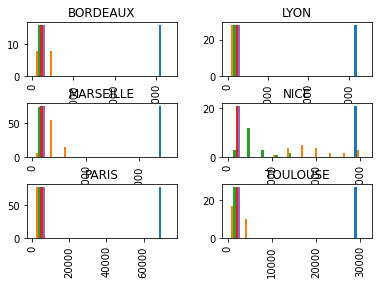

In [16]:
#prets['nom']=prets['type']
# histogramme median des taux par ville
#prets[['taux','ville']].plot.hist(alpha=0.5)

df_join.hist(column=['taux'], by='ville')


array([[<AxesSubplot:title={'center':'(automobile, LYON)'}>,
        <AxesSubplot:title={'center':'(automobile, MARSEILLE)'}>,
        <AxesSubplot:title={'center':'(automobile, NICE)'}>],
       [<AxesSubplot:title={'center':'(automobile, PARIS)'}>,
        <AxesSubplot:title={'center':'(automobile, TOULOUSE)'}>,
        <AxesSubplot:title={'center':'(immobilier, BORDEAUX)'}>],
       [<AxesSubplot:title={'center':'(immobilier, LYON)'}>,
        <AxesSubplot:title={'center':'(immobilier, MARSEILLE)'}>,
        <AxesSubplot:title={'center':'(immobilier, NICE)'}>],
       [<AxesSubplot:title={'center':'(immobilier, PARIS)'}>,
        <AxesSubplot:title={'center':'(immobilier, TOULOUSE)'}>,
        <AxesSubplot:>]], dtype=object)

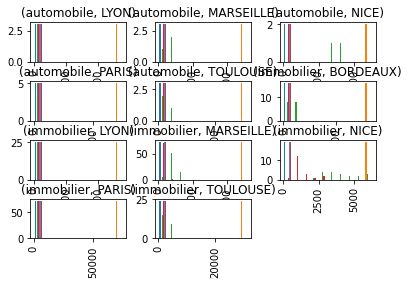

In [12]:
# histogramme median des taux par type et ville
#prets[['taux','ville', 'duree']].plot.hist(alpha=0.5)
df_join.hist(column=['taux'], by=['type', 'ville'])

<AxesSubplot:title={'center':'revenu'}, xlabel='ville'>

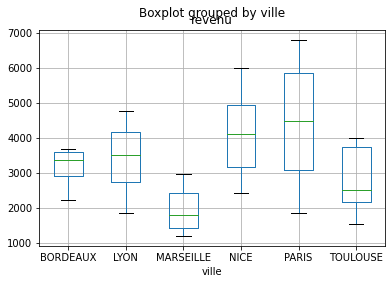

In [15]:
# boxplot des revenus par ville

df_join.boxplot(column=['revenu'],by='ville')

In [17]:
# une table qui contient les clients et leur emails avec les revuns supérieurs au revenu median
 
clients_mieux_payer = prets.set_index('identifiant').join(clients.set_index('identifiant'), how ='inner')
#print(clients_mieux_payer.revenu.mean())
clients_mieux_payer = clients_mieux_payer[clients_mieux_payer.revenu>clients_mieux_payer.revenu.median()]
print(clients_mieux_payer.head())

                ville     CP  revenu  remboursement  duree        type   taux  \
identifiant                                                                     
0            TOULOUSE  31100  3669.0        1130.05    240  immobilier  1.168   
1               PARIS  75009  5310.0         240.00     64  automobile  3.701   
1               PARIS  75009  5310.0        1247.85    300  immobilier  1.173   
7                NICE   6000  5486.0        2956.95    300  immobilier  1.184   
8            BORDEAUX  33200  3578.0         751.38    180  immobilier  1.316   

                                     email                 nom genre   hotname  
identifiant                                                                     
0                LaurentDagenais@rhyta.com    Laurent Dagenais     M     rhyta  
1                    GuyMarois@fleckens.hu          Guy Marois     M  fleckens  
1                    GuyMarois@fleckens.hu          Guy Marois     M  fleckens  
7                 AgramantP

In [28]:
#* le code postal (CP) ou on passe moins de temps  
#print(df_join.groupby('CP').sum())
cp_duree_min = df_join.groupby('CP').sum()
cp_duree_ = cp_duree_min[cp_duree_min.duree==cp_duree_min.duree.min()]
print(cp_duree_)

       revenu  remboursement  duree   taux
CP                                        
75006  6784.0        3744.77    180  1.248


In [33]:
#* 5 premier cp avec le plus haut taux  
df_join.sort_values(by='taux').iloc[-5:]['CP']


identifiant
101    69008
133    75011
148    31000
95     75016
1      75009
Name: CP, dtype: int64

In [35]:
#* 5 premier cp avec le plus haut revenu
df_join.sort_values(by='revenu').iloc[-5:]['CP']

identifiant
193    75003
122    75001
80     75019
173    75006
129    75012
Name: CP, dtype: int64

In [23]:
df_join.reset_index().head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux,email,nom,genre
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,LaurentDagenais@rhyta.com,Laurent Dagenais,M
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,GuyMarois@fleckens.hu,Guy Marois,M
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,GuyMarois@fleckens.hu,Guy Marois,M
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,BeaufortLesage@einrot.com,Beaufort Lesage,M
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,RussellDurand@armyspy.com,Russell Durand,M


In [11]:
data = pd.merge(prets, clients, on = 'identifiant', how = 'inner')
data.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux,email,nom,genre
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,LaurentDagenais@rhyta.com,Laurent Dagenais,M
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,GuyMarois@fleckens.hu,Guy Marois,M
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,GuyMarois@fleckens.hu,Guy Marois,M
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,BeaufortLesage@einrot.com,Beaufort Lesage,M
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,RussellDurand@armyspy.com,Russell Durand,M


In [21]:
data = pd.merge(prets, clients, on = 'nom', how = 'inner')
data.head()

,identifiant_x,ville,CP,revenu,remboursement,duree,type,taux,nom,identifiant_y,email,genre


In [26]:
df_result = prets.merge(clients, on='identifiant', how = 'inner')
df_result.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux,nom_x,email,nom_y,genre
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,immobilier,LaurentDagenais@rhyta.com,Laurent Dagenais,M
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,automobile,GuyMarois@fleckens.hu,Guy Marois,M
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,immobilier,GuyMarois@fleckens.hu,Guy Marois,M
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,immobilier,BeaufortLesage@einrot.com,Beaufort Lesage,M
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,immobilier,RussellDurand@armyspy.com,Russell Durand,M
